In [28]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes
import seaborn as sns

In [29]:
# loading and reading the data path and saving as a variable
file_path = '/Users/aryellewright/Documents/Documents - Aryelle’s MacBook Air/Kumar-Biomaterials-Lab/DLS_Plots/022324_DLSZeta_serum_gradientcopoly_NP1,5,7.5,10_pDNA50to10 copy.xlsx'
sheet_name = "Sheet1"  

# reading and saving data from specific excel sheet
df = pd.read_excel(file_path, sheet_name=sheet_name)

In [30]:
polymer = df['Polymer'][::-1]
diameter = df['Effective Diameter Avg.'][::-1]
stdev = df['Stddev'][::-1]

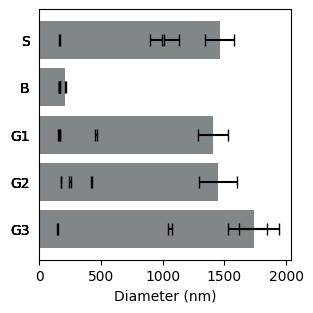

In [31]:
color_gray = "#818689"
plt.figure(figsize=(3.25, 3.25))

plt.barh(polymer, diameter, xerr=stdev, capsize = 4, color=color_gray)

plt.yticks(df['Polymer'], size=10)
plt.tick_params(left=False)
plt.xticks(size=10)
plt.xlabel('Diameter (nm)', size=10)

plt.show()

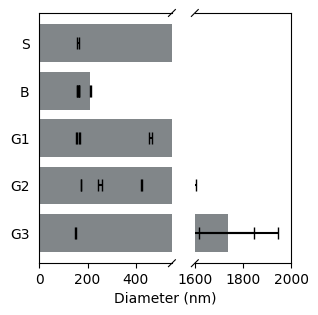

In [32]:
color_gray = "#818689"
plt.figure(figsize=(3.25, 3.25))

bax = brokenaxes(xlims=((0, 550), (1600, 2000)), hspace=0.1, despine=False)
bax.barh(polymer, diameter, xerr=stdev, capsize=4, color=color_gray)

# remove ticks on left side
for sax in bax.axs:
    sax.tick_params(left=False)

bax.big_ax.set_xlabel('Diameter (nm)', size=10, labelpad=20)

plt.show()

In [33]:
polymers = df['Polymer']
NP_ratio = df['N/P ratio']
diameters = df['Effective Diameter Avg.']
stdevs = df['Stddev']

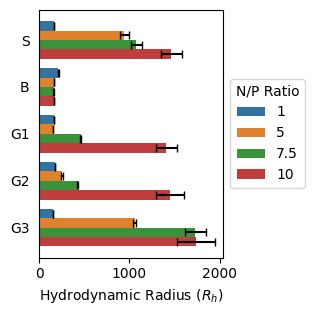

In [34]:
plt.figure(figsize=(3.25, 3.25))

bar_plot = sns.barplot(data=df, y=polymers, x=diameters, hue='N/P ratio', dodge=True)

ax = plt.gca()

num_polyplex = len(df['Polymer'].unique())
num_ratios = len(df['N/P ratio'].unique())

for poly_index, polyplex in enumerate(df['Polymer'].unique()):
    poly_df = df[df['Polymer'] == polyplex]
    for ratio_index, (np_ratio, group_df) in enumerate(poly_df.groupby('N/P ratio')):
        y = poly_index + (ratio_index - (num_ratios - 1) / 2) * 0.2  # Adjust 0.2 based on bar width
        mean_value = group_df['Effective Diameter Avg.'].mean()
        std_dev = group_df['Stddev'].mean()
        lower_limit = max(mean_value - std_dev, 0)
        error_length = abs(mean_value - lower_limit)

        plt.errorbar(y=y, x=mean_value,
                     xerr=error_length, fmt='none', c='black', capsize=3)


plt.xlabel('Hydrodynamic Radius (' + r'$R_h$' + ')')
plt.ylabel('')

handles, labels = ax.get_legend_handles_labels()

formatted_labels = [str(int(float(label))) if float(label).is_integer() else str(float(label)) for label in labels]

ax.legend(handles, formatted_labels, title='N/P Ratio', loc='upper left', bbox_to_anchor = (1,0.75), ncol=1)
ax.tick_params(left=False)

plt.tight_layout()
plt.show()


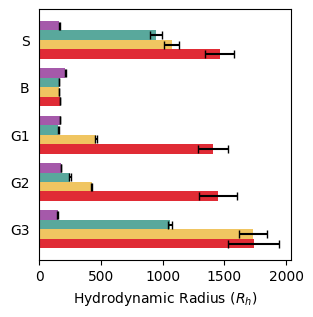

In [43]:
np_ratio_colors = {
    '1.0': '#a559aa',   # N/P = 1
    '5.0': '#59a89c',   # N/P = 5
    '7.5': '#f0c561', # N/P = 7.5
    '10.0': '#e02b35'   # N/P = 10
}

palette = [np_ratio_colors[str(ratio)] for ratio in df['N/P ratio'].unique()]
plt.figure(figsize=(3.25, 3.25))
bar_plot = sns.barplot(data=df, y=polymers, x=diameters, hue='N/P ratio', dodge=True, palette=palette)
ax = plt.gca()
num_polyplex = len(df['Polymer'].unique())
num_ratios = len(df['N/P ratio'].unique())

for poly_index, polyplex in enumerate(df['Polymer'].unique()):
    poly_df = df[df['Polymer'] == polyplex]

    for ratio_index, (np_ratio, group_df) in enumerate(poly_df.groupby('N/P ratio')):
        y = poly_index + (ratio_index - (num_ratios - 1) / 2) * 0.2  # Adjust based on bar width
        mean_value = group_df['Effective Diameter Avg.'].mean()  # Ensure 'diameters' is the correct column name
        color = np_ratio_colors[str(np_ratio)]

        plt.barh(y, mean_value, color=color, height=0.2)

        std_dev = group_df['Stddev'].mean()
        lower_limit = max(mean_value - std_dev, 0)
        error_length = abs(mean_value - lower_limit)

        plt.errorbar(x=mean_value, y=y, xerr=error_length, fmt='none', c='black', capsize=3)

handles, labels = ax.get_legend_handles_labels()
formatted_labels = [str(int(float(label))) if float(label).is_integer() else str(float(label)) for label in labels]
ax.legend(handles, formatted_labels, title='N/P Ratio', loc='upper left', bbox_to_anchor=(-0.5,0.75), ncol=1)
ax.tick_params(left=False)
ax.get_legend().remove()

plt.xlabel('Hydrodynamic Radius (' + r'$R_h$' + ')')
plt.ylabel('')

plt.show()